### Neste notebook, utilizarei Machine Learning para prever o tipo de flor de acordo com seus atributos

In [1]:
import pandas as pd

dados = pd.read_csv('iris.data', header = None)

dados

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
dados.columns = ['atributo1', 'atributo2', 'atributo3', 'atributo4', 'tipo']

dados

,atributo1,atributo2,atributo3,atributo4,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dados['tipo'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
dados['tipo'] = dados['tipo'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

dados

,atributo1,atributo2,atributo3,atributo4,tipo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   atributo1  150 non-null    float64
 1   atributo2  150 non-null    float64
 2   atributo3  150 non-null    float64
 3   atributo4  150 non-null    float64
 4   tipo       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Separando as variáveis

y = dados['tipo'] # é a variável alvo
X = dados.drop('tipo', axis = 1) # são as variáveis preditoras

In [7]:
# Criando o conjunto de dados de treino e de teste

from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

## Utilizando o ExtraTreesClassifier

In [8]:
# Instanciando o modelo de Machine Learning

from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier()

In [9]:
# Realizando o fit no modelo com os dados de treino

modelo.fit(X_treino, y_treino)

ExtraTreesClassifier()

In [10]:
# Score do modelo

modelo.score(X_teste, y_teste)

0.9333333333333333

In [11]:
# Previsoes

previsoes = modelo.predict(X_teste)

In [12]:
# R^2

from sklearn import metrics

metrics.r2_score(y_teste, previsoes)

0.8887973640856672

In [13]:
# Respostas certas

y_teste[0:5]

81     1
137    2
119    2
121    2
10     0
Name: tipo, dtype: int64

In [14]:
print(previsoes[0:5])

[1 2 1 2 0]


In [15]:
### Visualização gráfica

import matplotlib.pyplot as plt

dados_modelados = pd.DataFrame()
dados_modelados['y_teste'] = y_teste
dados_modelados['y_extratrees'] = previsoes

dados_modelados.reset_index(inplace = True)
dados_modelados.drop('index', axis = 1, inplace = True)
dados_modelados.head(10)

,y_teste,y_extratrees
0,1,1
1,2,2
2,2,1
3,2,2
4,0,0
5,2,2
6,2,2
7,2,2
8,0,0
9,0,0


In [16]:
dados_modelados.index

RangeIndex(start=0, stop=45, step=1)

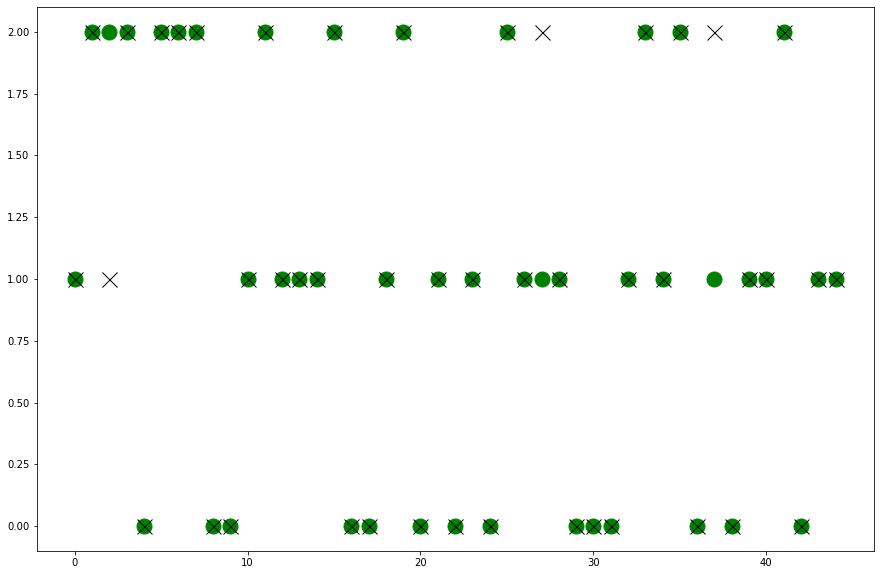

In [17]:
plt.figure(figsize = (15, 10))
plt.plot(dados_modelados.index, dados_modelados['y_teste'], 'go', 
         dados_modelados.index, dados_modelados['y_extratrees'], 'kx', markersize = 15)
plt.show()

# Os valores que possuem um X em cima são os valores que o modelo predisse corretamente